# Data Preparation

### 1) Memanggil Library pandas

Pandas kita gunakan untuk membaca dataset yang bentuknya dalam format “csv”

In [1]:
import pandas as pd

### 2) Memanggil Dataset

Data pertama adalah movies.csv yang berisi movieId, title, dan genres

In [2]:
data1 = pd.read_csv('movies.csv')
data1.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Data Kedua adalah ratings.csv yang berisi userId, movieId, dan rating

In [3]:
data2 = pd.read_csv('ratings.csv')
data2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### 3) Merge Dataset
Data ketiga merupakan hasil gabungan dari data movies dan rating. Menggunakan fungsi Merge

In [4]:
data3 = pd.merge(data1, data2)
data3.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


Pada data yang kita gunakan, umumnya ada data yang tidak ada, alias kosong, alias null, atau None, atau umum ditandai dengan NaN pada Python.
Berikut cara mengecek NaN pada data.

In [5]:
print("Jumlah NaN pada data : ", sum(data3.isnull().any()))

Jumlah NaN pada data :  0


In [6]:
data3.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

## Exploratory Data Analysis

### 4)  Memanggil Library yang dibutuhkan

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key text.latex.unicode in file C:\Users\ITD-STU\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\ITD-STU\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\ITD-STU\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplo

In [8]:
data3.userId.nunique(), data3.movieId.nunique()

(610, 9724)

Dari hasil tersebut didapatkan 610 user yang unik dan 9724 items yang unik.

###  5) Keseluruhan rating yang diberikan oleh user

<function matplotlib.pyplot.show(close=None, block=None)>

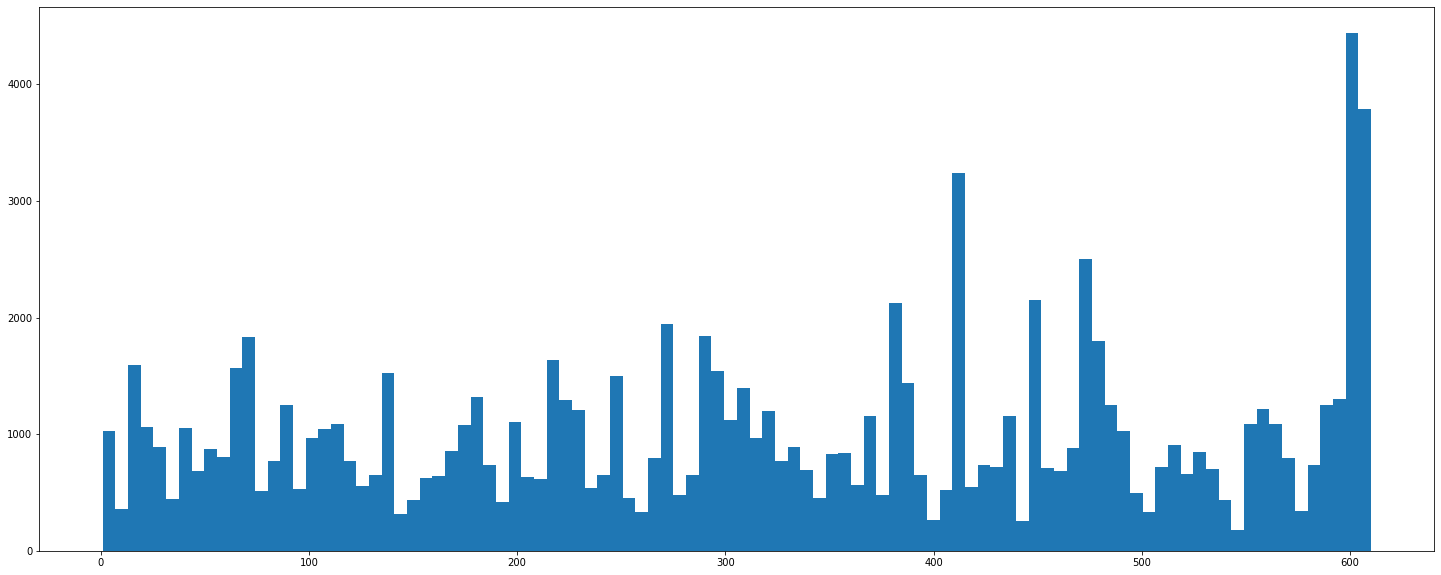

In [9]:
plt.figure(figsize=(25,10))
plt.hist(x=[data3.userId], bins=100)
plt.show

### 6) Distribusi rating user

C:\Users\ITD-STU\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


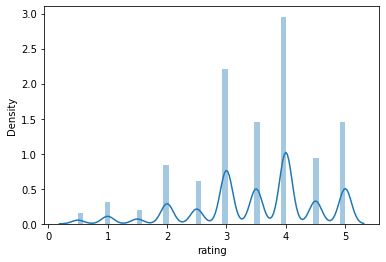

In [10]:
sns.distplot(data3["rating"]);

### 7) 10 movie yang paling banyak dirating

In [11]:
common = data3.groupby('title').size().sort_values(ascending=False)[:10]
common

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
dtype: int64

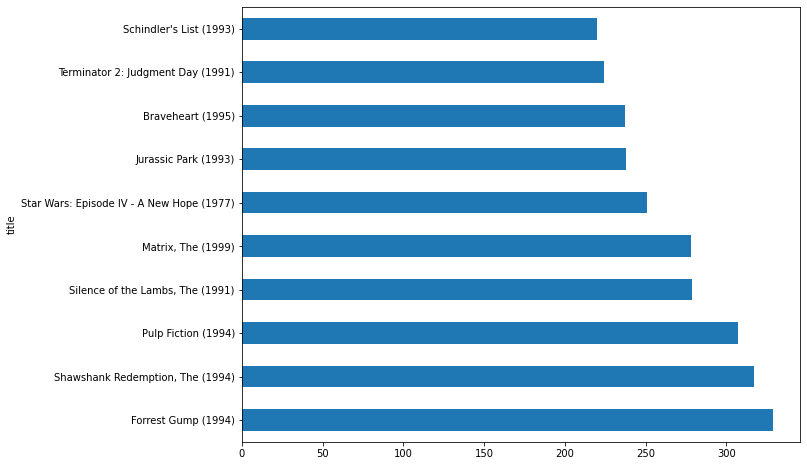

In [12]:
common = data3.groupby('title').size().sort_values(ascending=False)[:10]
common.plot(kind='barh', figsize=(10,8));

In [13]:
data3.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


### 8) Genre yang paling populer berdasarkan jumlah movie yang dirilis

<BarContainer object of 19 artists>

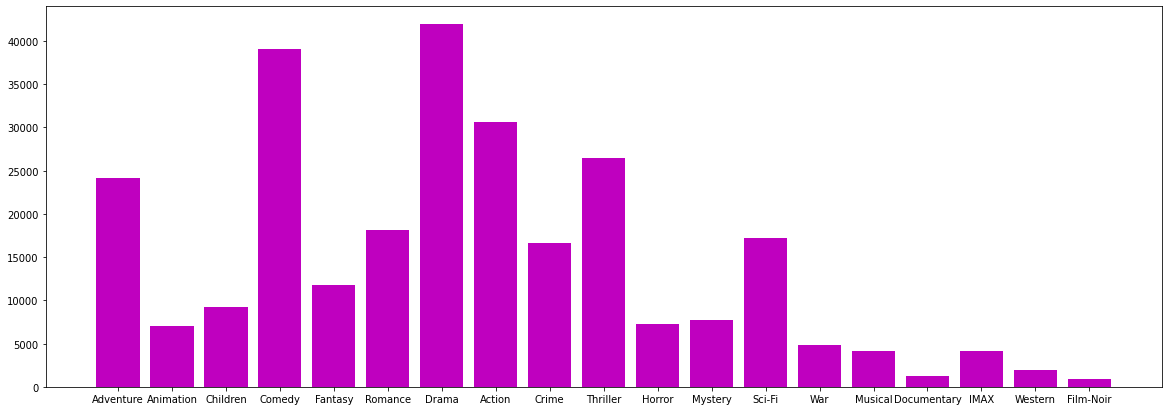

In [14]:
plt.figure(figsize=(20,7))
generlist = data3['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
geners_count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(geners_count.get(gener,False)):
            geners_count[gener]=geners_count[gener]+1
        else:
            geners_count[gener] = 1       
geners_count.pop("(no genres listed)")
plt.bar(geners_count.keys(),geners_count.values(),color='m')

In [15]:
movieId = data3.groupby('movieId').agg([np.mean, np.sum])
print(movieId)

             userId           rating            timestamp              
               mean    sum      mean    sum          mean           sum
movieId                                                                
1        306.530233  65904  3.920930  843.0  1.129835e+09  242914455479
2        329.554545  36251  3.431818  377.5  1.135805e+09  124938583322
3        283.596154  14747  3.259615  169.5  1.005110e+09   52265734386
4        219.857143   1539  2.357143   16.5  8.985789e+08    6290052048
5        299.571429  14679  3.071429  150.5  9.926643e+08   48640552594
...             ...    ...       ...    ...           ...           ...
193581   184.000000    184  4.000000    4.0  1.537109e+09    1537109082
193583   184.000000    184  3.500000    3.5  1.537110e+09    1537109545
193585   184.000000    184  3.500000    3.5  1.537110e+09    1537109805
193587   184.000000    184  3.500000    3.5  1.537110e+09    1537110021
193609   331.000000    331  4.000000    4.0  1.537158e+09    153

In [16]:
title = data3.groupby('title').agg([np.mean, np.sum])
print(title)

                                            movieId              userId        \
                                               mean     sum        mean   sum   
title                                                                           
'71 (2014)                                 117867.0  117867  610.000000   610   
'Hellboy': The Seeds of Creation (2004)     97757.0   97757  332.000000   332   
'Round Midnight (1986)                      26564.0   53128  354.500000   709   
'Salem's Lot (2004)                         27751.0   27751  345.000000   345   
'Til There Was You (1997)                     779.0    1558  229.000000   458   
...                                             ...     ...         ...   ...   
eXistenZ (1999)                              2600.0   57200  389.954545  8579   
xXx (2002)                                   5507.0  132168  272.916667  6550   
xXx: State of the Union (2005)              33158.0  165790  386.000000  1930   
¡Three Amigos! (1986)       

### 9) Film dengan Rating rata-rata tertinggi

In [18]:
ratings_grouped_by_movies = data3.groupby('movieId').agg([np.mean], np.size)

In [19]:
ratings_grouped_by_movies = ratings_grouped_by_movies.drop('timestamp', axis=1)
ratings_grouped_by_movies.head(10)

,userId,rating
,mean,mean
movieId,,
1,306.530233,3.920930
2,329.554545,3.431818
3,283.596154,3.259615
4,219.857143,2.357143
5,299.571429,3.071429
6,309.647059,3.946078
7,279.000000,3.185185
8,258.250000,2.875000


In [20]:
ratings_grouped_by_movies = ratings_grouped_by_movies.drop('userId', axis=1)
ratings_grouped_by_movies.shape

(9724, 1)

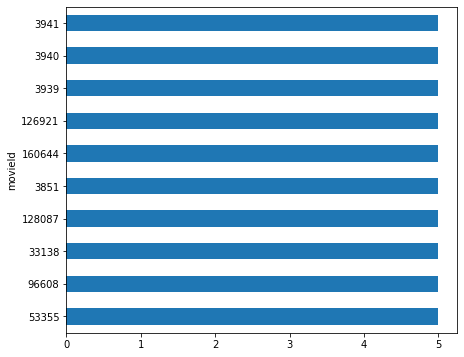

In [21]:
ratings_grouped_by_movies['rating']['mean'].sort_values(ascending=False).head(10).plot(kind = 'barh', figsize=(7,6));

### 10) Film dengan Rating rata-rata terendah

In [22]:
low_rated_movies_filter = ratings_grouped_by_movies['rating']['mean']<1.5

In [23]:
low_rated_movies = ratings_grouped_by_movies[low_rated_movies_filter]

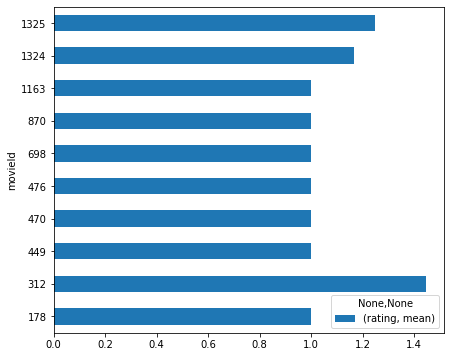

In [24]:
low_rated_movies.head(10).plot(kind='barh', figsize=(7,6));

In [25]:
low_rated_movies.head(10)

,rating
,mean
movieId,
178,1.000000
312,1.444444
449,1.000000
470,1.000000
476,1.000000
698,1.000000
870,1.000000
1163,1.000000


## Content Based Model

Konsep Term Frequency (TF) dan Inverse Document Frequency (IDF) digunakan dalam content based recommender. TF/IDF digunakan untuk menentukan kepentingan relatif dari film

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Menentukan TF-IDF Vectorizer Object.
tfidf_data1_genres = TfidfVectorizer(token_pattern = '[a-zA-Z0-9\-]+')

# Mengganti NaN dengan string kosong
data1['genres'] = data1['genres'].replace(to_replace="(no genres listed)", value="")


In [27]:
# Membuat matriks TF-IDF yang diperlukan dengan menyesuaikan dan mengubah data
tfidf_data1_genres_matrix = tfidf_data1_genres.fit_transform(data1['genres'])
print(tfidf_data1_genres.get_feature_names())

['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'imax', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']


In [28]:
# Pengecekan tupple
print(tfidf_data1_genres_matrix.shape)

(9742, 19)


In [29]:
# Pengecekan tipe data
print(tfidf_data1_genres_matrix.dtype)

float64


In [30]:
# Menghitung cosine similarity 
cosine_sim_movies = linear_kernel(tfidf_data1_genres_matrix, tfidf_data1_genres_matrix)
print(cosine_sim_movies)


[[1.         0.81357774 0.15276924 ... 0.         0.4210373  0.26758648]
 [0.81357774 1.         0.         ... 0.         0.         0.        ]
 [0.15276924 0.         1.         ... 0.         0.         0.57091541]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.4210373  0.         0.         ... 0.         1.         0.        ]
 [0.26758648 0.         0.57091541 ... 0.         0.         1.        ]]


Selanjutnya, dibuat fungsi untuk membuat daftar film berdasarkan kemiripannya dengan film lain. Misalkan terdapat film A, maka akan direkomendasikan daftar 3 film yang memiliki kemiripan paling tinggi dengan film A berdasarkan cosine similarity matrix yang telah dibuat.

In [31]:
# fungsi untuk mengambil judul film sebagai input
def get_recommendations(movie_title, cosine_sim_movies=cosine_sim_movies):
  
    # Mengambil indeks film yang sesuai dengan judul film
    idx_movie = data1.loc[data1['title'].isin([movie_title])]
    idx_movie = idx_movie.index
    
    # Mengambil similarity scores pasangan dari semua film dengan film itu
    sim_scores_movies = list(enumerate(cosine_sim_movies[idx_movie][0]))
    
    # Mengurutkan film berdasarkan similarity scores
    sim_scores_movies = sorted(sim_scores_movies, key=lambda x: x[1], reverse=True)

    # Mengambil skor 10 film paling mirip
    sim_scores_movies = sim_scores_movies[1:3]
    
    # Mendapatkan indeks film
    movie_indices = [i[0] for i in sim_scores_movies]
    
    # Mendapatkan 2 film paling mirip 
    return data1['title'].iloc[movie_indices]

In [32]:
# Mendapatkan rekomendasi film yang memiliki kemiripan dengan film Flint (2017)
get_recommendations("Flint (2017)")

25            Othello (1995)
30    Dangerous Minds (1995)
Name: title, dtype: object